# Exercise 4
### For this Exercise Click in Show Widgets and wait for it to load
In this exercise you are going to decrypt a html link to download a picture to after filter and play with. But first your first task is to write your User name of uniandes to see what is the message you are going to decrypt and the key used to encrypted the message.

__Note__: Each of you will have a different message and a different key so the image to treat will be unique fr each one of you.


In [1]:
# nbi:hide_in
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
def f(x):
    data=pd.read_csv("https://raw.githubusercontent.com/JoseMontanaC/Laboratorio-Metodos-Computacionales/master/1/Lista_Grupo_1.csv")
    if x in list(data["Nombre de usuario"]):
        return data.loc[data["Nombre de usuario"]==x]
    else:
        return "Usuario NO valido"

Nombre_Pelao=widgets.Text(value="",description='Usuario:',disabled=False,)
widgets.interact(f,x=Nombre_Pelao);

interactive(children=(Text(value='', description='Usuario:'), Output()), _dom_classes=('widget-interact',))

after you have your key and your message to decrypt you will need to know the way it was done.

# Simple way to Cypher a message.

They way this was done was by assigning each character of the alphabet an unique number. For this case we are going to use

```c++
1  2  3  4  5  6  7  8  9  0  /  -  _  %  ?  \  *  .  :  a  b  c  d  e  f  g  h  i
0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
--------------------------------------------------------------------------------
j  k  l  m  n  o  p  q  r  s  t  u  v  w  x  y  z  !  "  #  $  &  +  @  |  ¨  ~   
28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
```

So in this way instead of those characters we are going to encrypt a message with its corresponding number
```c++
m  y  _  w  o  r  d
31 43 14 41 33 36 22
```

Then we add to each obtained digit consecutive digits from the key. For example. in the case of key equal to 136

```c++
m  y  _  w  o  r  d
31 43 14 41 33 36 22
1  3  6  1  3  6  1
----------------------
32 46 20 42 36 42 23 --------> n"bxrxe
```
An in this way with the help of the key we can send the message ``n"bxrxe`` and if the person has the key would be able to decrypt the message and the numeric assignation of the characters.  

In [2]:
# nbi:hide_in
from itertools import cycle
def Encrypt_message(message,key):
    message=message.lower()
    characters='1234567890/-_%?\*.:abcdefghijklmnopqrstuvwxyz!"#$&+@|¨~'
    Encrypt=dict((c, i) for i, c in enumerate(characters))
    Decrypt=dict((i, c) for i, c in enumerate(characters))
    result=""
    for i,j in zip(message,cycle(str(key))):
        result+=Decrypt[Encrypt[i]+int(j)]
    return result
def Decrypt_message(message,key):
    characters='1234567890/-_%?\*.:abcdefghijklmnopqrstuvwxyz!"#$&+@|¨~'
    Encrypt=dict((c, i) for i, c in enumerate(characters))
    Decrypt=dict((i, c) for i, c in enumerate(characters))
    result=""
    for i,j in zip(message,cycle(str(key))):
        result+=Decrypt[Encrypt[i]-int(j)]
    return result

# Examples:
In order to see the dependence of the key take a look at the next examples, we are going to encrypt the next link ``https://www.google.com/``

In [3]:
# nbi:hide_in
key=136597896
print("Message encrypted with key {}:".format(key),"\n")
encrypted_messsage=Encrypt_message('https://www.google.com/',key)
print(encrypted_messsage,"\n")
print("-"*50)
print("Message decrypted with key {}:".format(key),"\n")
print(Decrypt_message(encrypted_messsage,key))


print("\n"+"-"*50+"\n")
key=569842
encrypted_messsage=Encrypt_message('https://www.google.com/',key)
print("Message encrypted with key {}:".format(key),"\n")
print(encrypted_messsage,"\n")
print("-"*50)
print("Message decrypted with key {}:".format(key),"\n")
print(Decrypt_message(encrypted_messsage,key))

print("\n"+"-"*50+"\n")
key=79009897
encrypted_messsage=Encrypt_message('https://www.google.com/',key)
print("Message encrypted with key {}:".format(key),"\n")
print(encrypted_messsage,"\n")
print("-"*50)
print("Message decrypted with key {}:".format(key),"\n")
print(Decrypt_message(encrypted_messsage,key))

print("\n"+"-"*50+"\n")
key=649875004556883
encrypted_messsage=Encrypt_message('https://www.google.com/',key)
print("Message encrypted with key {}:".format(key),"\n")
print(encrypted_messsage,"\n")
print("-"*50)
print("Message decrypted with key {}:".format(key),"\n")
print(Decrypt_message(encrypted_messsage,key))

Message encrypted with key 136597896: 

iwzu"g:a#xzelxvouk:fura 

--------------------------------------------------
Message decrypted with key 136597896: 

https://www.google.com/

--------------------------------------------------

Message encrypted with key 569842: 

mz#xwb\*+&!aluxopgdixu? 

--------------------------------------------------
Message decrypted with key 569842: 

https://www.google.com/

--------------------------------------------------

Message encrypted with key 79009897: 

o#tp"ha.$+w.pwxnsn.cxua 

--------------------------------------------------
Message decrypted with key 79009897: 

https://www.google.com/

--------------------------------------------------

Message encrypted with key 649875004556883: 

nx#xze//!""eowrmpngjtm/ 

--------------------------------------------------
Message decrypted with key 649875004556883: 

https://www.google.com/


## If you want you can paste your answer here to generate the link to the photo

In [4]:
# nbi:hide_in
from IPython.core.display import HTML
from IPython.display import display, Image
def g(x):
    if x == "":
        pass
    elif not x.startswith("https://raw.githubusercontent.com/JoseMontanaC/Laboratorio-Metodos-Computacionales/master"):
        pass
    elif not x.endswith(".png"):
        pass
    else:
        display(HTML('<a href="'+x+'"><center><font color=hsl(9, 100%, 64%) size="5" face ="consolas">Link to the Photo</font></center></a>'))
        display(Image(url=x))
direccion=widgets.Text(value="",description='URL:')
widgets.interact(g,x=direccion);

interactive(children=(Text(value='', description='URL:'), Output()), _dom_classes=('widget-interact',))

Once you have your photo saved you will meet my Dog. Her name is Lambda, Now that you have met her, your task is to filter the picture in a certain way.
1. First open the picture using ``matplotlib`` as:
    ```python
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img=np.array(mpimg.imread("Location_of_photo",format="rbg"))
imgplot = plt.imshow(img)
plt.show()
    ```
    Opening the picture in this way you have charged the image as an array, therefore you can use it as discussed.
2. Check the minimum and the maximum value of the picture. Does it make sense to you?. Filter then all pixels that are more than $20$ and less than $200$ did the picture change a lot?
3. Since the position of the dog varies for every picture the first operation to apply is to try to locate the position of the dog and then make square filter in order to set all pixels of the picture to $0$ except the ones the dog is in the picture.
__Hint__: You will find useful the slicing of the arrays or if you prefer use a ``meshgrid`` with the same dimensions of the picture:
```python
np.meshgrid(range(rows),range(colums))
```
4. Followed by this you will implement a circular filter of the face of the dog, to do this first try to locate the center of its face and then implement a filter such that the circular region surrounds the face of the dog, and the rest of the pixels set them to zero.
__Hint__: Compute the Euclidian distance for this and you may find quite useful the function ``np.meshgrid`` from ``numpy ``
5. Now your final task is to combine the last filter and a change in the pixels. For that first you are going to change form the format ``RGB`` to a ``gray scale``. in order to do this you will need to use the next formula
$$
 \text{Intensity}=0.299 * R + 0.587 * G + 0.114 * B
$$
So you will need to implement a function in order to create a new image that will have only black and white and then with the last part make a circle on the face of the Dog to show the same picture as before but this time in ``gray scale`` format.
__Hint__: To plot properly in a ``gray scale`` in ``matplotlib`` it is necessary to use:
    ```python
plt.imshow(image_with_filters,cmap="gray")
```
The ``cmap`` is the argument which establish the way ``python`` set the colors

At the end you should have something like the next example (but with your own photo):

# Original Image:

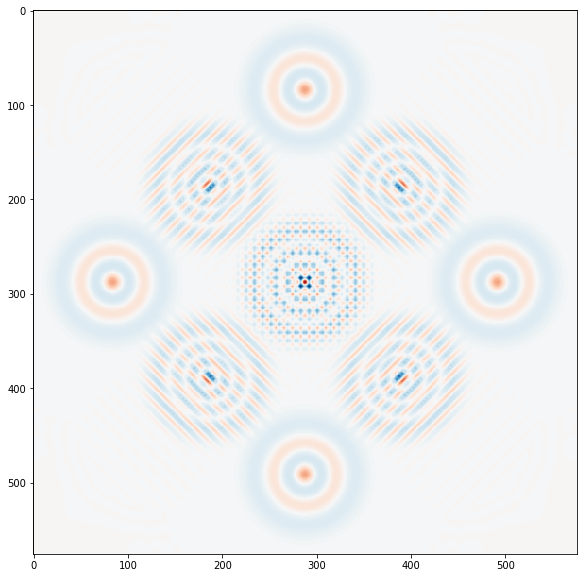

In [5]:
# nbi:hide_in
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
plt.figure(figsize=(10,10))
img=mpimg.imread("https://raw.githubusercontent.com/JoseMontanaC/Laboratorio-Metodos-Computacionales/master/Wigner_2.png")
row,colum,layers=img.shape
plt.imshow(img[:,:,:])
plt.show()

# With the first Filter (Squared)

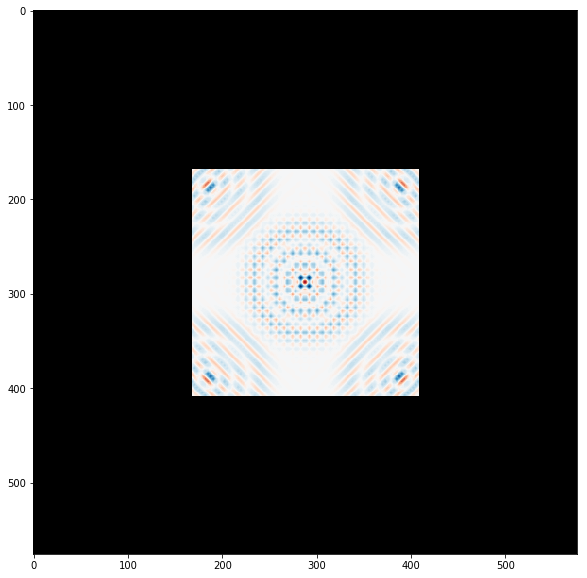

In [6]:
# nbi:hide_in
plt.figure(figsize=(10,10))
img=mpimg.imread("https://raw.githubusercontent.com/JoseMontanaC/Laboratorio-Metodos-Computacionales/master/Wigner_2.png")
X,Y = np.meshgrid(range(row),range(colum))
d=120
x_c,y_c=row/2,colum/2
distance_x=np.abs(X-x_c)
distance_y=np.abs(Y-y_c)
squared_mask=(distance_x>d) + (distance_y>d)
img[squared_mask]=0
plt.imshow(img)
plt.show()

# Or if you want a Diamond you can use

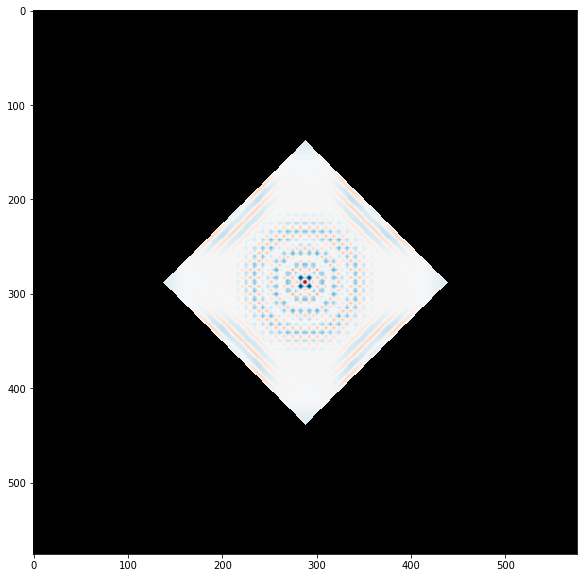

In [7]:
# nbi:hide_in
plt.figure(figsize=(10,10))
img=mpimg.imread("https://raw.githubusercontent.com/JoseMontanaC/Laboratorio-Metodos-Computacionales/master/Wigner_2.png")
X,Y = np.meshgrid(range(row),range(colum))
d=150
distance=np.abs((X-x_c))+np.abs(Y-y_c)
Diamond_mask= distance>d
img[Diamond_mask]=0
plt.imshow(img)
plt.show()

# Now with the Circle Filter

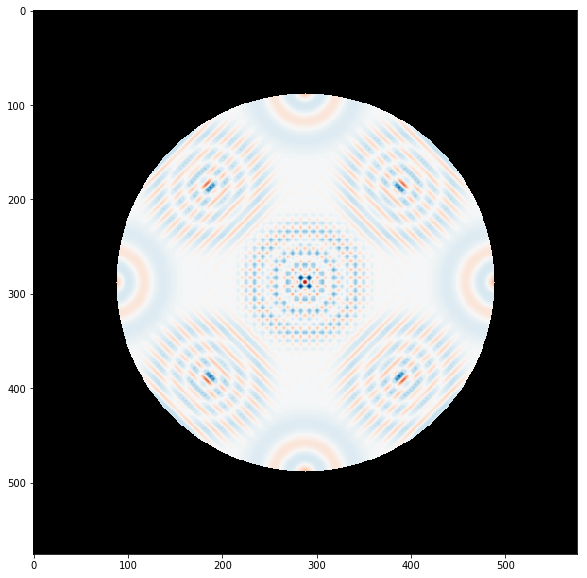

In [8]:
# nbi:hide_in
img=mpimg.imread("https://raw.githubusercontent.com/JoseMontanaC/Laboratorio-Metodos-Computacionales/master/Wigner_2.png")
X,Y = np.meshgrid(range(row),range(colum))
R=(200)**2
x_c,y_c=row/2,colum/2

dist_from_center=(X-x_c)**2+(Y-y_c)**2
mask=dist_from_center>R
img[mask]=0
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

# And finally the gray scale

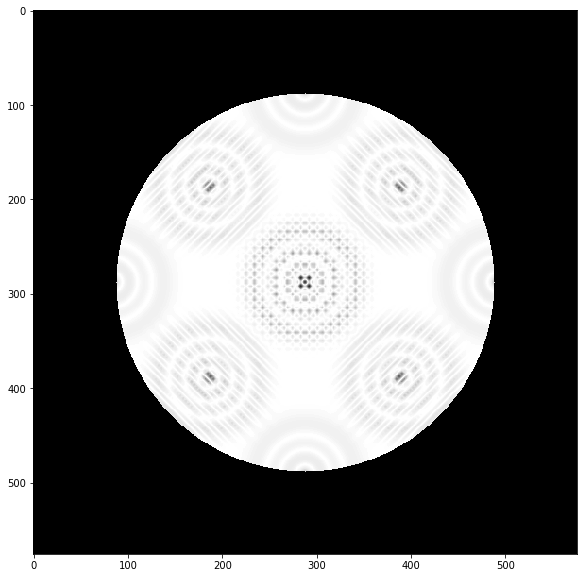

In [9]:
# nbi:hide_in
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray
plt.figure(figsize=(10,10))
plt.imshow(rgb2gray(img),cmap="gray")
plt.show()